In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('E:\python practice\hate_speech_smalldataset.csv')

df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.drop(columns=["Unnamed: 0","count","hate_speech","offensive_language","neither"],axis=1,inplace=True)


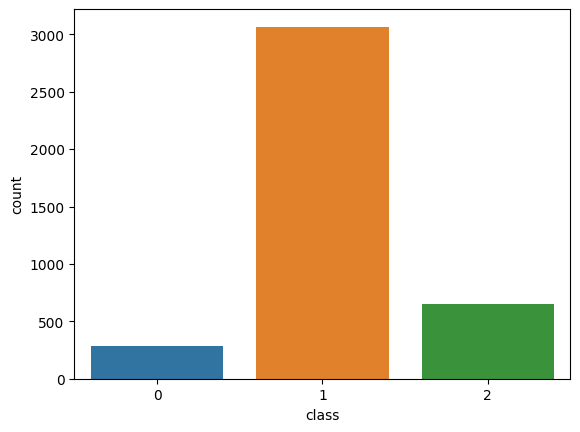

In [4]:
df.head()
sns.countplot(x ='class', data = df)
plt.show()

In [5]:
df[df['class']==2].head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,2,""" momma said no pussy cats inside my doghouse """
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."


In [6]:
#df["class"].replace({0: 1}, inplace=True)
#df['class'].unique()
sns.countplot('class',data=df)

C:\Users\Amjad Net Cafe\.conda\envs\myEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

In [7]:
#df[df['class']==0]

In [8]:
df["class"].replace({2: 0}, inplace=True)

In [9]:
sns.countplot('class',data=df)

C:\Users\Amjad Net Cafe\.conda\envs\myEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='class', ylabel='count'>

In [10]:
df[df['class']==0].head(20)


,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
40,0,""" momma said no pussy cats inside my doghouse """
63,0,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,0,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,0,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."
70,0,"""@ArizonasFinest6: Why the eggplant emoji doe?..."
75,0,"""@BabyAnimalPics: baby monkey bathtime http://..."
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."


# Data Cleaning

In [11]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    tweets = re.sub('[^-9A-Za-z]', ' ', df['tweet'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    
    tweets = [ps.stem(word) for word in tweets if not word in stopwords.words('english')]
    tweets = ' '.join(tweets)
    corpus.append(tweets)

[nltk_data] Downloading package stopwords to C:\Users\Amjad Net
[nltk_data]     Cafe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Bag Of Words 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
    
cv = CountVectorizer(max_features =5000,ngram_range=(1,2))
x=cv.fit_transform(corpus).toarray()
y=df['class']


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.40)


# Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=100)
lr.fit(xtrain,ytrain)

LogisticRegression()

# Prediction

In [15]:
y_pred=lr.predict(xtest)

# Accuracy ,Precission And Recall  Score

In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

accu_scr_lr=accuracy_score(ytest,y_pred)*100
print(accu_scr_lr)

prec_scr_lr=precision_score(ytest,y_pred)*100
print(prec_scr_lr)

recall_scr_lr=recall_score(ytest,y_pred)*100
print(recall_scr_lr)

87.32042473454091
91.44684252597922
92.25806451612904


# Naive Bayes Model  Training

In [17]:
from sklearn.naive_bayes import MultinomialNB
nv=MultinomialNB(alpha=3.6)
#from sklearn.naive_bayes import GaussianNB
#model=GaussianNB()
#model.fit(xtrain_count,ytrain)
nv.fit(xtrain,ytrain)

MultinomialNB(alpha=3.6)

In [18]:
y_pred1=nv.predict(xtest)
y_pred1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
accu_scr_nb=accuracy_score(ytest,y_pred1)*100
print(accu_scr_nb)

prec_scr_nb=precision_score(ytest,y_pred1)*100
print(prec_scr_nb)

recall_scr_nb=recall_score(ytest,y_pred1)*100
print(recall_scr_nb)

84.50968144909432
84.3015214384509
98.30645161290322


# Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dt.fit(xtrain, ytrain)
dt.score(xtest,ytest)

0.8413491567770144

In [21]:
y_pred2=dt.predict(xtest)


In [22]:
accu_scr_dt=accuracy_score(ytest,y_pred2)*100
print(accu_scr_dt)

prec_scr_dt=precision_score(ytest,y_pred2)*100
print(prec_scr_dt)

recall_scr_dt=recall_score(ytest,y_pred2)*100
print(recall_scr_dt)

84.13491567770144
97.77131782945736
81.37096774193549


# Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(xtrain,ytrain)

y_pred3=rf.predict(xtest)
y_pred3
rf.score(xtest,ytest)




0.891317926296065

In [24]:
#Accuracy
accu_scr_rf=accuracy_score(ytest,y_pred3)*100
print(accu_scr_rf)

prec_scr_rf=precision_score(ytest,y_pred3)*100
print(prec_scr_rf)

recall_scr_rf=recall_score(ytest,y_pred3)*100
print(recall_scr_rf)


89.1317926296065
92.03470031545741
94.11290322580645


# KNN Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn.score(xtest,ytest)

y_pred4=knn.predict(xtest)
y_pred4
rf.score(xtest,ytest)



0.891317926296065

In [26]:
#Accuracy
accu_scr_knn=accuracy_score(ytest,y_pred4)*100
print(accu_scr_knn)

prec_scr_knn=precision_score(ytest,y_pred4)*100
print(prec_scr_knn)

recall_scr_knn=recall_score(ytest,y_pred4)*100
print(recall_scr_knn)

82.57339163023111
86.87643898695319
91.29032258064517


# SVM Model

In [27]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)
y_pred5=svm.predict(xtest)

svm.score(xtest,ytest)


0.8819487820112429

In [28]:
#Accuracy
accu_scr_svm=accuracy_score(ytest,y_pred5)*100
print(accu_scr_svm)

prec_scr_svm=precision_score(ytest,y_pred5)*100
print(prec_scr_svm)

recall_scr_svm=recall_score(ytest,y_pred5)*100
print(recall_scr_svm)

88.1948782011243
91.4759273875296
93.46774193548387


In [29]:

from texttable import Texttable

# texttable takes the first reocrd in the list as the column names
# of the table
Data = [["Classifiers", "Average Accuracy", "Average Precision","Average Recall"],
        ["SVM", accu_scr_svm,prec_scr_svm,recall_scr_svm],
        ["LR",accu_scr_lr,prec_scr_lr,recall_scr_lr ],
        ["DTC",accu_scr_dt,prec_scr_dt,recall_scr_dt],
        ["RFC", accu_scr_rf,prec_scr_rf,recall_scr_rf],
        ["NBC", accu_scr_nb,prec_scr_nb,recall_scr_nb],
        ["KNN", accu_scr_knn,prec_scr_knn,recall_scr_knn]]

table = Texttable()
table.add_rows(Data)
print(table.draw())



+-------------+------------------+-------------------+----------------+
| Classifiers | Average Accuracy | Average Precision | Average Recall |
+=============+==================+===================+================+
| SVM         | 88.195           | 91.476            | 93.468         |
+-------------+------------------+-------------------+----------------+
| LR          | 87.320           | 91.447            | 92.258         |
+-------------+------------------+-------------------+----------------+
| DTC         | 84.135           | 97.771            | 81.371         |
+-------------+------------------+-------------------+----------------+
| RFC         | 89.132           | 92.035            | 94.113         |
+-------------+------------------+-------------------+----------------+
| NBC         | 84.510           | 84.302            | 98.306         |
+-------------+------------------+-------------------+----------------+
| KNN         | 82.573           | 86.876            | 91.290   

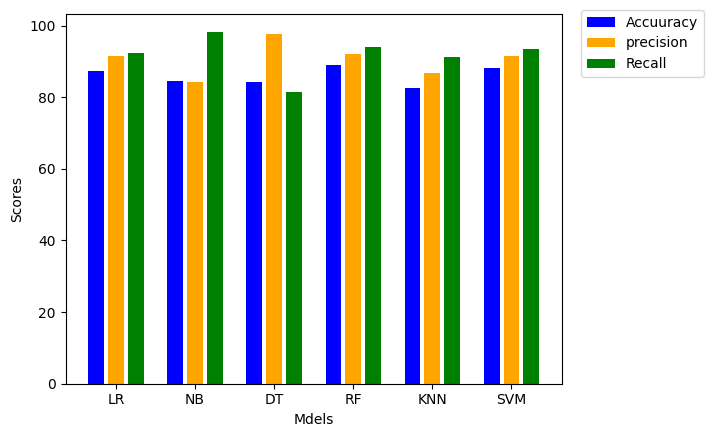

In [31]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
X = np.arange(6)
y1= [accu_scr_lr,accu_scr_nb,accu_scr_dt,accu_scr_rf,accu_scr_knn,accu_scr_svm]
    
y2=[prec_scr_lr,prec_scr_nb,prec_scr_dt,prec_scr_rf,prec_scr_knn,prec_scr_svm]

y3=[recall_scr_lr,recall_scr_nb,recall_scr_dt,recall_scr_rf,recall_scr_knn,recall_scr_svm]
width=0.2
  
# plot data in grouped manner of bar type
plt.bar(X-0.25, y1, width, color='blue')
plt.bar(X, y2, width, color='orange')
plt.bar(X+0.25, y3, width, color='green')
plt.xticks(X, ["LR","NB","DT","RF","KNN","SVM"])
plt.xlabel("Mdels")
plt.ylabel("Scores")
plt.legend(["Accuuracy","precision","Recall"], bbox_to_anchor =(1.3,1.03),ncol=1)
plt.show()